In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn import linear_model 
from sklearn import tree
from sklearn.svm import SVC   
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
% matplotlib inline

In [2]:
df1 = pd.read_csv('TeamMonthTotal.csv')

In [3]:
df2 = pd.read_csv('PlayerMonthTotal.csv')

### How many features in Team stats?

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11932 entries, 0 to 11931
Data columns (total 47 columns):
Unnamed: 0    11932 non-null int64
Team          11932 non-null object
MP            11932 non-null int64
FG            11932 non-null int64
FGA           11932 non-null int64
FG%           11932 non-null float64
2P            11932 non-null int64
2PA           11932 non-null int64
2P%           11932 non-null float64
3P            11932 non-null int64
3PA           11932 non-null int64
3P%           11932 non-null float64
FT            11932 non-null int64
FTA           11932 non-null int64
FT%           11929 non-null float64
ORB           11932 non-null int64
DRB           11932 non-null int64
TRB           11932 non-null int64
AST           11932 non-null int64
STL           11932 non-null int64
BLK           11932 non-null int64
TOV           11932 non-null int64
PF            11932 non-null int64
PTS           11932 non-null int64
Opp FG        11932 non-null int64
Opp FGA

### What if I wanna check maryland's winning games?

In [5]:
df1[(df1.Team == 'maryland')][(df1['Win?'] == 1)]

/Users/jiangchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?
139,1323,maryland,200,20,52,0.385,16,38,0.421,4,...,17,21,11,8,5,12,21,56,1111201670,1
692,13134,maryland,200,26,58,0.448,19,31,0.613,7,...,22,32,7,6,4,15,24,75,1115201621,1
911,15144,maryland,200,27,62,0.435,20,35,0.571,7,...,21,23,5,6,1,24,33,45,1117201630,1
1315,12188,maryland,200,18,51,0.353,9,25,0.360,9,...,24,38,10,4,4,12,27,66,1120201632,1
1573,151105,maryland,200,23,47,0.489,15,28,0.536,8,...,24,36,10,1,2,12,23,63,1122201641,1
1883,13378,maryland,225,27,67,0.403,17,36,0.472,10,...,28,34,20,9,2,15,24,82,1125201633,1
2069,14402,maryland,200,25,55,0.455,20,38,0.526,5,...,20,31,10,4,2,9,21,68,1126201644,1
2791,13114,maryland,200,24,59,0.407,20,37,0.541,4,...,25,41,13,7,5,15,25,70,1203201661,1
3183,1576,maryland,200,29,58,0.500,17,28,0.607,12,...,18,26,9,6,1,11,11,56,1207201626,1
3423,13192,maryland,200,20,44,0.455,13,26,0.500,7,...,24,33,11,3,2,10,22,56,1210201662,1


### What if I wanna check a certain game with a specific gameid?

In [6]:
df1[df1.gameid == 114201750]

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?
6292,12279,maryland,200,23,54,0.426,17,32,0.531,6,...,27,32,12,3,1,12,20,56,114201750,1
6293,13277,illinois,200,21,56,0.375,14,34,0.412,7,...,28,35,10,8,3,11,16,62,114201750,0


### I wanna check a certain team's players stats in a certain game

In [7]:
df2[df2.gameid == 1115201621][df2.Team == 'maryland']

/Users/jiangchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,player,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,gameid
74602,2449,Melo Trimble,36,7,13,0.538,6,9,0.667,1,...,1,1,2,1,0,4,3,22,maryland,1115201621
74603,3446,Anthony Cowan,26,3,8,0.375,3,4,0.750,0,...,4,5,5,3,0,2,4,11,maryland,1115201621
74604,4446,Kevin Huerter,25,2,4,0.500,0,1,0.000,2,...,4,5,2,1,2,0,3,6,maryland,1115201621
74605,5446,Damonte Dodd,24,2,3,0.667,2,3,0.667,0,...,4,5,0,0,4,3,4,4,maryland,1115201621
74606,6446,L.G. Gill,9,1,1,1.000,1,1,1.000,0,...,0,0,0,0,0,1,4,2,maryland,1115201621
74607,8446,Justin Jackson,26,7,12,0.583,4,7,0.571,3,...,5,7,0,1,0,3,4,17,maryland,1115201621
74608,9446,Jared Nickens,19,1,7,0.143,0,1,0.000,1,...,0,0,1,0,1,0,1,5,maryland,1115201621
74609,10446,Jaylen Brantley,14,0,3,0.000,0,0,NaN,0,...,2,2,1,0,0,0,2,0,maryland,1115201621
74610,11438,Ivan Bender,11,3,3,1.000,3,3,1.000,0,...,3,6,0,0,0,1,3,9,maryland,1115201621
74611,12416,Dion Wiley,10,0,4,0.000,0,2,0.000,0,...,2,2,0,0,0,0,4,0,maryland,1115201621


### How many unique team are in the dataset?

In [8]:
len(df1.Team.unique())

640

### Get rid of teams with lower than certain games played:

In [9]:
# specify the number of games that if less, you wanna ignore
def uselessTeam(x):
    a = []
    for t in df1.Team.unique():
        if len(df1[df1.Team == t]) < x:
            a.append(t)
            df1.drop(df1[df1.Team == t].index.get_level_values(0), inplace=True)
        else:
            continue
    return len(a)

In [10]:
uselessTeam(25)

289

### check the number of teams left after deleting teams with less than 25 games

In [11]:
len(df1.Team.unique())

351

In [12]:
# ignore gameid with games less than 2
def ignoreGames(x):
    a = []
    for i in df1.gameid.unique():
        if len(df1[df1.gameid == i]) < x:
            a.append(df1[df1.gameid == i])
            df1.drop(df1[df1.gameid == i].index.get_level_values(0), inplace=True)
        else:
            continue
    return len(a)

In [13]:
ignoreGames(2)

437

In [14]:
len(df1)

11058

In [15]:
awayName=[]
for t, gameid in enumerate(df1.gameid):
    if t % 2 ==0:
        smalldf=df1[df1.gameid == gameid]
        a=str(smalldf.iloc[1][1])
        b=smalldf.iloc[0][1]
        awayName.append(a)
        awayName.append(b)
    else:
        None
df1['awayName']=awayName

In [16]:
df1.head()

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?,awayName
4,121,coastal-carolina,200,17,62,0.274,8,39,0.205,9,...,36,13,8,8,11,19,70,111120163,0,alabama
5,14,alabama,200,21,48,0.438,11,22,0.500,10,...,31,7,2,2,13,22,53,111120163,1,coastal-carolina
6,13,arkansas-pine-bluff,200,22,62,0.355,12,36,0.333,10,...,41,19,10,9,15,19,86,111120164,0,alabama-birmingham
7,141,alabama-birmingham,200,25,53,0.472,22,37,0.595,3,...,27,10,7,1,17,28,66,111120164,1,arkansas-pine-bluff
8,16,portland-state,200,26,67,0.388,20,40,0.500,6,...,40,11,7,3,16,15,88,111120165,0,arizona-state


In [17]:
trainMean = df1.drop(['Unnamed: 0', 'gameid', 'Win?'], axis=1)
trainMean = trainMean.groupby('Team').mean().round(2)

In [18]:
trainMean

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
Team,,,,,,,,,,,,,,,,,,,,,
abilene-christian,204.00,24.44,53.32,0.46,17.36,34.24,0.51,7.08,19.08,0.37,...,0.66,8.80,23.68,32.48,13.60,6.04,3.16,14.56,17.24,72.64
air-force,202.45,24.23,56.61,0.43,16.29,34.74,0.47,7.94,21.87,0.37,...,0.73,7.39,24.97,32.35,15.84,6.29,3.48,11.87,20.52,75.61
akron,200.03,26.24,56.47,0.47,16.03,28.94,0.56,10.21,27.53,0.38,...,0.70,8.18,22.03,30.21,11.76,5.82,2.09,11.24,18.59,71.97
alabama,202.94,23.79,56.15,0.42,17.18,35.26,0.49,6.62,20.88,0.32,...,0.67,7.79,21.59,29.38,9.56,6.32,2.94,13.12,19.47,64.71
alabama-am,202.59,21.66,53.41,0.41,17.34,38.00,0.46,4.31,15.41,0.27,...,0.68,10.97,22.90,33.86,14.14,6.86,3.45,9.07,18.34,77.76
alabama-birmingham,201.61,24.94,54.61,0.46,19.00,36.97,0.52,5.94,17.65,0.34,...,0.72,8.55,21.32,29.87,12.74,6.71,2.97,11.29,18.16,70.94
alabama-state,203.30,23.10,59.33,0.39,16.73,37.70,0.45,6.37,21.63,0.30,...,0.67,9.93,23.90,33.83,12.83,7.17,3.03,12.40,18.37,74.57
albany-ny,200.00,25.56,54.71,0.47,20.06,39.88,0.51,5.50,14.82,0.36,...,0.71,6.12,19.56,25.68,12.68,5.71,3.97,10.94,17.97,66.03
alcorn-state,200.90,24.34,57.62,0.42,17.79,37.14,0.48,6.55,20.48,0.32,...,0.65,9.66,23.45,33.10,13.52,6.90,2.59,12.69,17.10,69.03


In [19]:
len(trainMean.loc['maryland'])

43

###  Features added
#possession = FGA + 0.475 x FTA - ORB + TOV
#OR100: Offensive Rate per 100 Possessions (pts per 100 possessions)
#DR100: Defensive Rate per 100 Possessions (pts allowed per 100 possessions)
#SM100: Score Margin per 100 Possessions (pts per 100 possessions)
#GmSc:
Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.)
#Margin of Victory; the formula is PTS - Opp PTS.
#Pace
Pace Factor (available since the 1973-74 season in the NBA); the formula is 48 * ((Tm Poss + Opp Poss) / (2 * (Tm MP / 5))). Pace factor is an estimate of the number of possessions per 48 minutes by a team. (Note: 40 minutes is used in the calculation for the WNBA.)这个几乎没区别
#STL%: Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
#TOV%: Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.
#TRB%: Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.
#TSA: True Shooting Attempts; the formula is FGA + 0.44 * FTA.
#TPTS: True Points Per Attempt; the formula is PTS / TSA
#TS%: 0.5 x points/(FGA + 0.475 x FTA) True Shooting Percentage
#USG%

In [20]:
addon = pd.DataFrame()
addon['OR100'] = (trainMean['PTS']/
                      (trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'])*100)
addon['DR100'] = (trainMean['Opp PTS']/
                      (trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'])*100)
addon['SM100'] = addon['OR100'] - addon['DR100']
addon['GMSC'] = trainMean['PTS']+0.4*trainMean['FG']-0.7*trainMean['FGA']-0.4*(trainMean['FTA']-trainMean['FT']) \
                    +0.7*trainMean['ORB']+0.3*trainMean['DRB']+trainMean['STL']+0.7*trainMean['AST']+0.7*trainMean['BLK'] \
                    -0.4*trainMean['PF']-trainMean['TOV']
addon['MOV'] = trainMean['PTS'] - trainMean['Opp PTS']
addon['PACE'] = 40*((trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'] \
                         + trainMean['Opp FGA']+0.475*trainMean['Opp FTA']-trainMean['Opp ORB']+trainMean['Opp TOV']) \
                         / (2*(trainMean['MP'] / 5)))
addon['STL%'] = (trainMean['STL']*(trainMean['MP']/5)) / (trainMean['MP']* \
                        trainMean['Opp FGA']+0.475*trainMean['Opp FTA']-trainMean['Opp ORB']+trainMean['Opp TOV'])
addon['TOV%'] = trainMean['TOV']/(trainMean['FGA']+0.44*trainMean['FTA']+trainMean['TOV'])
addon['TRB%'] = (trainMean['TRB']*(trainMean['MP']/5)) / (trainMean['MP']*(trainMean['TRB']+trainMean['Opp TRB']))
addon['TSA'] = trainMean['FGA']+0.44*trainMean['FTA']
addon['TPTS'] = trainMean['PTS'] / addon['TSA']
addon['TS%'] = 0.5*trainMean['PTS']/(trainMean['FGA']+0.475*trainMean['FTA'])

In [21]:
# total wins
def winAndLoss():
    Team=[]
    TW=[]
    TL=[]
    WP=[]
    ASTP=[]
    BLKP=[]
    DRBP=[]
    ORBP=[]
    EFGP=[]
    for x in set(df1['Team']):
        df=df1[df1['Team']==x]
        row=df.iloc[0]
        Team.append(row[1])
        TW.append(df['Win?'].sum())
        TL.append(len(df['Win?'])-df['Win?'].sum())
        WP.append(round(df['Win?'].sum()/len(df['Win?']),2))
        df5=pd.DataFrame({'Team':Team,'TW':TW,'TL':TL,'W%':WP})
        a=trainMean[trainMean.index==x]
        ASTP.append(round(((100*a['AST'].values[0])/a['FG'].values[0])-a['FG'].values[0],2))
        #100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG)
        BLKP.append(round(((100*a['BLK'].values[0])/(a['Opp FGA'].values[0]-a['Opp 3PA'].values[0])),2))
        #100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA))
        DRBP.append(round((100*a['DRB'].values[0])/(a['DRB'].values[0]-a['Opp ORB'].values[0]),2))
        #100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB))
        ORBP.append(round((100*a['ORB'].values[0])/(a['ORB'].values[0]+a['Opp DRB'].values[0]),2))
        #100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB))
        EFGP.append(round((a['FG'].values[0]+0.5*a['3P'].values[0])/a['FGA'].values[0],2))
        #(FG + 0.5 * 3P) / FGA
        df5['AST%']=ASTP
        df5['BLK%']=BLKP
        df5['DRB%']=DRBP
        df5['ORB%']=ORBP
        df5['EFG%']=EFGP
    return df5

In [22]:
teamMetric=winAndLoss()

In [23]:
listACCteams = ['north-carolina','virginia','florida-state','louisville','notre-dame','syracuse','duke','virginia-tech','georgia-tech','miami','wake-forest','clemson','north-carolina-state','boston-college','pittsburgh']
listPac12teams = ['southern-california','arizona','oregon','ucla','california','utah','washington-state','stanford','arizona-state','colorado','washington','oregon-state']
listSECteams = ['mississippi','louisiana-state','kentucky','southern-california','florida','arkansas','alabama','tennessee','mississippi-state','georgia','vanderbilt','auburn','texas-am','missouri']
listBig10teams = ['maryland','wisconsin','purdue','northwestern','michigan-state','indiana','iowa','michigan','penn-state','nebraska','minnesota','illinois','ohio-state','rutgers']
listBig12teams = ['texas-christian','kansas','baylor','west-virginia','iowa-state','kansas-state','texas-tech','oklahoma-state','texas','oklahoma']
listBigEastteams = ['butler','creighton','dePaul','georgetown','marquette','providence','seton-hall','st-johns-ny','villanova','xavier']

In [24]:
def checkPower6Conference(teamName):
    if (teamName in listACCteams or teamName in listBig10teams or teamName in listBig12teams
       or teamName in listSECteams or teamName in listPac12teams or teamName in listBigEastteams):
        return 1
    else:
        return 0

In [25]:
Power6=[]
for x in teamMetric['Team']:
    Power6.append(checkPower6Conference(x))
teamMetric['Power6']=Power6

In [26]:
teamMetric = teamMetric.set_index('Team')

In [27]:
teamMetric.head()

,TL,TW,W%,AST%,BLK%,DRB%,ORB%,EFG%,Power6
Team,,,,,,,,,
arkansas-pine-bluff,24,6,0.20,25.56,8.85,209.74,28.08,0.46,0
rider,15,18,0.55,23.90,9.34,152.14,31.10,0.49,0
ohio,11,19,0.63,21.89,7.28,156.17,23.06,0.53,0
mississippi-valley-state,25,7,0.22,20.18,5.19,195.19,28.43,0.47,0
missouri-state,16,16,0.50,23.01,10.31,140.57,31.33,0.51,0


In [28]:
addon = addon.round(2)
addon[addon.index=='maryland']

,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
Team,,,,,,,,,,,,
maryland,104.98,98.53,6.45,53.15,4.5,69.28,0.02,0.16,0.1,64.97,1.13,0.56


In [29]:
# try to see how team performence of SM100 ranked
addon.sort_values(['SM100'], ascending=0).head(10)

,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
Team,,,,,,,,,,,,
gonzaga,114.07,84.90,29.17,68.05,21.13,72.02,0.02,0.14,0.11,68.50,1.21,0.60
wichita-state,113.82,88.06,25.75,65.12,18.29,71.24,0.02,0.14,0.11,69.07,1.17,0.58
saint-marys-ca,116.51,92.96,23.55,59.00,14.56,62.12,0.02,0.15,0.12,59.31,1.21,0.60
southern-methodist,115.12,93.01,22.11,61.65,14.26,64.51,0.02,0.14,0.11,64.01,1.16,0.57
villanova,116.89,94.90,21.99,63.58,14.52,66.61,0.03,0.15,0.11,62.43,1.24,0.61
west-virginia,110.47,90.42,20.04,65.99,14.78,72.45,0.04,0.14,0.11,73.83,1.10,0.55
cincinnati,111.80,92.31,19.49,61.79,12.95,66.24,0.03,0.12,0.11,67.19,1.11,0.55
ucla,119.24,100.28,18.96,77.67,14.28,75.28,0.02,0.13,0.11,72.04,1.25,0.62
oregon,112.34,94.57,17.77,64.43,12.42,70.09,0.02,0.15,0.11,66.79,1.18,0.58


In [30]:
teamStats = pd.concat([trainMean, teamMetric, addon], axis=1)

In [31]:
teamStats.shape[1]

64

In [32]:
def normalizeInput(arr):
    for i in range(arr.shape[1]):
        minVal = min(arr.iloc[:,i])
        maxVal = max(arr.iloc[:,i])
        arr.iloc[:,i] =  (arr.iloc[:,i] - minVal) / (maxVal - minVal)
    return arr
# # alternative:
# def normalize(X):
#     return (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

In [33]:
normalizeInput(teamStats)

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
abilene-christian,0.515883,0.320741,0.224604,0.647059,0.421100,0.436565,0.523810,0.369469,0.297738,0.6250,...,0.350488,0.277255,0.332732,0.318977,0.666667,0.7,0.25,0.233804,0.571429,0.588235
air-force,0.318933,0.305185,0.377912,0.470588,0.324617,0.460685,0.333333,0.464602,0.390552,0.6250,...,0.369989,0.404446,0.350773,0.353945,0.333333,0.4,0.50,0.418605,0.542857,0.529412
akron,0.011436,0.454074,0.371389,0.705882,0.301172,0.180897,0.761905,0.715708,0.578842,0.6875,...,0.593897,0.545532,0.575258,0.338166,0.333333,0.3,0.50,0.403654,0.771429,0.764706
alabama,0.381194,0.272593,0.356477,0.411765,0.404869,0.485769,0.428571,0.318584,0.357618,0.3125,...,0.572770,0.328987,0.553866,0.303198,0.333333,0.5,0.75,0.413621,0.400000,0.352941
alabama-am,0.336722,0.114815,0.228798,0.352941,0.419297,0.617945,0.285714,0.063053,0.175649,0.0000,...,0.050560,0.075032,0.043814,0.225586,0.000000,0.5,0.25,0.285714,0.257143,0.235294
alabama-birmingham,0.212198,0.357778,0.284716,0.647059,0.568981,0.568259,0.571429,0.243363,0.250166,0.4375,...,0.471470,0.452330,0.453608,0.305330,0.333333,0.5,0.50,0.328073,0.600000,0.588235
alabama-state,0.426938,0.221481,0.504660,0.235294,0.364292,0.603473,0.238095,0.290929,0.382568,0.1875,...,0.249187,0.101753,0.223454,0.399574,0.333333,0.6,0.50,0.519518,0.171429,0.117647
albany-ny,0.007624,0.403704,0.289376,0.705882,0.664563,0.708635,0.523810,0.194690,0.156021,0.5625,...,0.596425,0.408294,0.572165,0.193177,0.333333,0.3,0.75,0.287375,0.628571,0.647059
alcorn-state,0.121982,0.313333,0.424977,0.411765,0.459874,0.576459,0.380952,0.310841,0.344311,0.3125,...,0.438064,0.291150,0.420103,0.374414,0.333333,0.5,0.50,0.419435,0.371429,0.352941
american,0.116900,0.219259,0.129543,0.647059,0.435528,0.411481,0.571429,0.200221,0.246840,0.3750,...,0.289635,0.182129,0.282990,0.182090,0.666667,0.6,0.25,0.098422,0.457143,0.411765


In [34]:
teamStats=teamStats.reset_index()
teamStats.rename(columns={teamStats.columns[0]: "Team"}, inplace=True)
teamStats=teamStats.reset_index()
teamStats['index']=teamStats['index']+1000
teamIndex=teamStats.iloc[:,0:2]
teamIndex2=teamStats.iloc[:,0:2]
teamIndex2.rename(columns={"Team": "awayName"}, inplace=True)
del teamStats['Team']
df1 = pd.merge(df1, teamIndex, on='Team', how='left')
df1.rename(columns={"index": "Homeid"}, inplace=True)
df1 = pd.merge(df1, teamIndex2, on='awayName', how='left')
df1.rename(columns={"index": "Awayid"}, inplace=True)

In [35]:
df1.head()

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?,awayName,Homeid,Awayid
0,121,coastal-carolina,200,17,62,0.274,8,39,0.205,9,...,8,8,11,19,70,111120163,0,alabama,1059,1003
1,14,alabama,200,21,48,0.438,11,22,0.500,10,...,2,2,13,22,53,111120163,1,coastal-carolina,1003,1059
2,13,arkansas-pine-bluff,200,22,62,0.355,12,36,0.333,10,...,10,9,15,19,86,111120164,0,alabama-birmingham,1015,1005
3,141,alabama-birmingham,200,25,53,0.472,22,37,0.595,3,...,7,1,17,28,66,111120164,1,arkansas-pine-bluff,1005,1015
4,16,portland-state,200,26,67,0.388,20,40,0.500,6,...,7,3,16,15,88,111120165,0,arizona-state,1242,1012


In [36]:
# # ignore gameid with games less than 2
# def ignorePlayers(x):
#     a = []
#     for i in df2.gameid.unique():
#         if len(df2[df2.gameid == i]) < x:
#             a.append(df2[df2.gameid == i])
#             df2.drop(df2[df2.gameid == i].index.get_level_values(0), inplace=True)
#         else:
#             continue
#     return len(a)

In [37]:
# ignorePlayers(25)

In [38]:
# playerMean = df2.groupby('player').mean().round(2)

In [39]:
# playerMean = playerMean.drop(['MP','Unnamed: 0', 'gameid'], axis=1)

In [40]:
# playerMean.sort_values(['PTS'],ascending=False)

In [41]:
def getSeasonData(team_id):
    b = []
    a = teamStats[teamStats['index'] == team_id]
    for i in range(a.shape[1]):
        b.append(a.iloc[0,i])
    return b

In [42]:
getSeasonData(1000)

[1000,
 0.51588310038119445,
 0.32074074074074088,
 0.22460391425908674,
 0.64705882352941191,
 0.42110009017132544,
 0.43656536420646408,
 0.52380952380952384,
 0.36946902654867259,
 0.29773785761809712,
 0.625,
 0.23371251292657708,
 0.41849886277482934,
 0.20000000000000012,
 0.27728613569321542,
 0.29237668161434988,
 0.29511918274687871,
 0.37188755020080311,
 0.53951367781155024,
 0.24760076775431858,
 0.62429057888762773,
 0.75626204238920991,
 0.29868883914294836,
 0.38607594936708856,
 0.22963895885810245,
 0.66666666666666674,
 0.39393939393939398,
 0.36881959910913131,
 0.63157894736842124,
 0.41158536585365857,
 0.29732937685459948,
 0.49999999999999978,
 0.5840779853777418,
 0.62753702687877133,
 0.28571428571428592,
 0.37746478873239442,
 0.44846153846153836,
 0.41553202218860302,
 0.42187499999999989,
 0.40365448504983381,
 0.41317365269461082,
 0.53560975609756101,
 0.31196054254007372,
 0.42038709677419361,
 0.51851851851851849,
 0.22222222222222221,
 0.358695652173913

In [43]:
def compareTwoTeams(id_1, id_2):
    team_1 = getSeasonData(id_1)
    team_2 = getSeasonData(id_2)
    diff = [a - b for a, b in zip(team_1, team_2)]
    diff.pop(0)
    return diff

In [44]:
compareTwoTeams(1057,1166)

[-0.002541296060992404,
 0.10296296296296298,
 0.14911463187325241,
 0.0,
 0.21911632100991879,
 0.27641099855282186,
 -0.047619047619047672,
 -0.11504424778761052,
 -0.084497671324018586,
 -0.12500000000000017,
 -0.024819027921406445,
 -0.090978013646701994,
 0.10000000000000003,
 0.11504424778761063,
 -0.13901345291479827,
 -0.022701475595913734,
 -0.13172690763052203,
 0.28419452887537999,
 -0.12476007677543199,
 -0.23155505107832003,
 -0.32851637764932562,
 0.048289094979213409,
 0.14838255977496484,
 0.0058774139378670598,
 0.20000000000000018,
 0.084848484848484895,
 -0.10155902004454315,
 0.26315789473684215,
 0.1737804878048782,
 0.14362017804154292,
 0.071428571428571119,
 -0.21039805036555645,
 -0.27098189797037847,
 0.42857142857142894,
 -0.1492957746478874,
 0.020000000000000129,
 -0.040342914775592598,
 0.12760416666666657,
 -0.17109634551495018,
 -0.080838323353293495,
 0.12975609756097561,
 -0.019728729963008673,
 0.071483870967741836,
 0.25925925925925924,
 -0.166666666

In [45]:
def getCleansedData(arr):
    x = []
    y = []
    for i in range(len(arr)):
        x.append(compareTwoTeams(arr['Homeid'][i],arr['Awayid'][i]))
        y.append(arr['Win?'])
    return x,y

In [46]:
x,y = getCleansedData(df1)

In [47]:
len(x)

11058

In [48]:
len(y)

11058

In [101]:
x = pd.DataFrame(x,columns=teamStats.columns[1:])

In [146]:
model1 = linear_model.LogisticRegression()
model2 = RandomForestClassifier(n_estimators=64)
model3 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.1)
model4 = SVC()
model5 = ExtraTreesClassifier()
model6 = GradientBoostingClassifier(n_estimators=100)
model7 = GradientBoostingRegressor(n_estimators=100, max_depth=5)
model8 = AdaBoostClassifier(n_estimators=100)
model9 = KNeighborsClassifier(n_neighbors=39)
model10 = linear_model.BayesianRidge()
model11 = linear_model.Lasso()
model12 = tree.DecisionTreeClassifier()
model13 = tree.DecisionTreeRegressor()

In [102]:
def modelTest(clf,n):
    accuracy=[]
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(x, y[0])
        results = clf.fit(X_train, Y_train)
        preds = clf.predict(X_test)

        preds[preds < .5] = 0
        preds[preds >= .5] = 1
        accuracy.append(np.mean(preds == Y_test))
        print("Finished iteration:", i+1)
    print("The accuracy is", sum(accuracy)/len(accuracy))

In [147]:
modelTest(model1,1)

Finished iteration: 1
The accuracy is 0.734900542495


In [150]:
modelTest(model2,1)

Finished iteration: 1
The accuracy is 0.693670886076


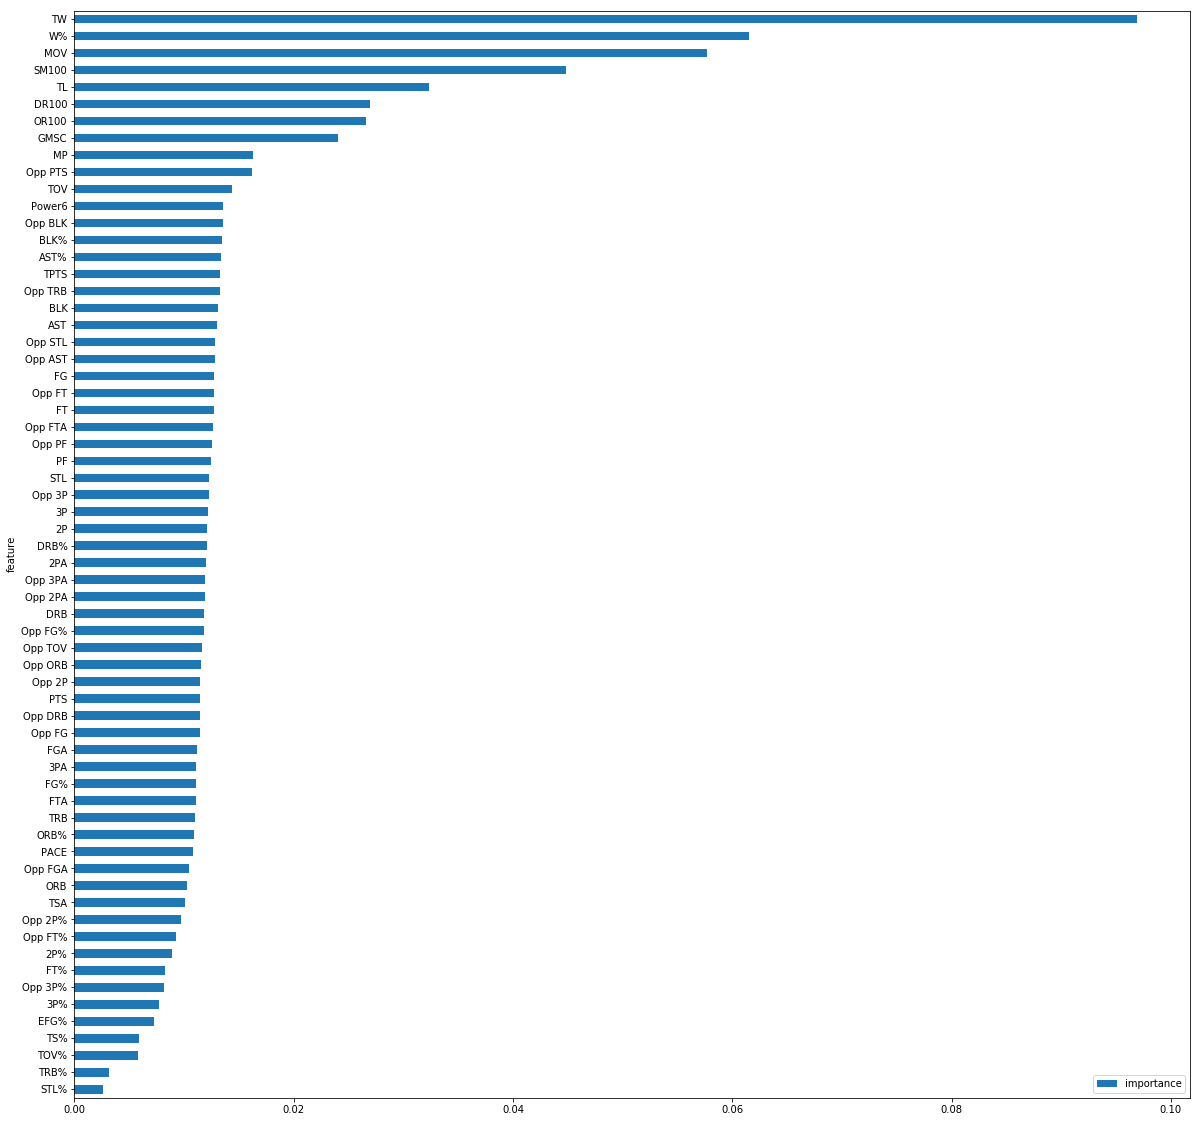

In [151]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importance'] = model2.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [152]:
model100 = SelectFromModel(model1, prefit=True)
X_train_reduced = model100.transform(x)

In [153]:
X_train_reduced.shape

(11058, 20)

In [155]:
clf = model1
accuracy=[]
for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(X_train_reduced, y[0])
    results = clf.fit(X_train, Y_train)
    preds = clf.predict(X_test)

    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == Y_test))
    print("Finished iteration:", i+1)
print("The accuracy is", sum(accuracy)/len(accuracy))

Finished iteration: 1
The accuracy is 0.744665461121


In [86]:
modelTest(model3,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.736057866184


In [87]:
modelTest(model4,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.739168173599


In [88]:
modelTest(model5,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.674575045208


In [89]:
modelTest(model6,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.735262206148


In [90]:
modelTest(model7,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.732585895118


In [91]:
modelTest(model8,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.738444846293


In [92]:
modelTest(model9,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.722459312839


In [107]:
modelTest(model10,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.740470162749


In [108]:
modelTest(model11,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.491500904159


In [97]:
modelTest(model12,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.63616636528


In [98]:
modelTest(model13,5)

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
The accuracy is 0.636672694394


### trying to find the team with substring

In [53]:
def findTeam(arr):
    for i in range(len(df1)):
        if arr in df1['Team'][i]:
            print(df1['Team'][i])
        else:
            continue

In [54]:
findTeam('purdue')

purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue
purdue


In [ ]:
def predictTwoTeams(team1_name,team2_name):
    team1_id = teamIndex[teamIndex['Team']==team1_name].values[0][0]
    team2_id = teamIndex[teamIndex['Team']==team2_name].values[0][0]
    predResult = model1.predict([compareTwoTeams(team1_id,team2_id)])
    if predResult[0] == 0:
        print(team2_name, 'wins')
    else:
        print(team1_name, 'wins')

In [ ]:
predictTwoTeams('north-carolina','gonzaga')

In [55]:
predictTwoTeams('michigan','wisconsin')

wisconsin wins
